# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The second step is to import data from the given file.

In [2]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(4000, 3)
(6000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [3]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

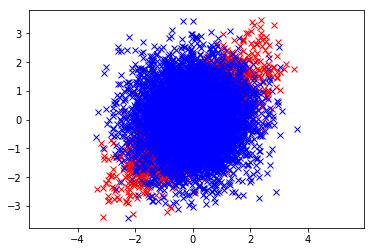

In [4]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
#plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

After creating an algorithm and generating labels, one should update the original CSV file.

In [5]:
#Start my coding here
#Adopt Quadratic Discriminant classifier
# Prior probability for label 0 is 0.6 and 0.4 for label 1
prior0 = 0.6
prior1 = 0.4
u1 = np.mean(df0,axis=0)
u0 = np.mean(df1,axis=0)
mean0 = [u0[0],u0[1]]
mean1 = [u1[0],u1[1]]
dfftest = np.transpose(dftest)
dff0 = np.transpose(df1)
cov0 = np.cov(dff0[0:2])
dff1 = np.transpose(df0)
cov1 = np.cov(dff1[0:2])
inv0 = np.linalg.inv(cov0)
inv1 = np.linalg.inv(cov1)
mean0 = np.transpose(np.matrix(mean0))
mean1 = np.transpose(np.matrix(mean1))
cov0 = np.matrix(cov0)
cov1 = np.matrix(cov1)
inv0 = np.matrix(inv0)
inv1 = np.matrix(inv1)
A = (-0.5)*(inv1 - inv0)
b = (inv1*mean1)-(inv0*mean0)
det0 = np.linalg.det(cov0)
det1 = np.linalg.det(cov1)
c = ((-0.5)*((np.transpose(mean1)*inv1*mean1)-(np.transpose(mean0)*inv0*mean0)))-((-0.5)*(np.log(det1/det0)))+(np.log(0.4/0.6))

def QDA(x):
    Dec = (np.transpose(x)*A*x)+(np.transpose(b)*x)+c
    return Dec


In [6]:
for i in range(10000,15000,1):
    m = np.matrix([dfftest[0:2][i]])
    value = QDA(np.transpose(m))
    n = float(value)
    if n<0:
        r = 0
    else:
        r = 1
    dftest.set_value(i,"label",r)

In [7]:
total = 0
for i in range(0,6000,1):
    m = np.matrix([dff0[0:2][i]])
    value = QDA(np.transpose(m))
    total = value +total
print total/6000
total = 0
for i in range(6000,10000,1):
    m = np.matrix([dff1[0:2][i]])
    value = QDA(np.transpose(m))
    total = value +total
    
print total/4000

[[-1.50183947]]
[[-0.64243272]]


In [8]:
df = pd.concat([df0, df1, dftest], join='outer', ignore_index=True)
df.to_csv("1challenge.csv")

(389, 3)
(4611, 3)


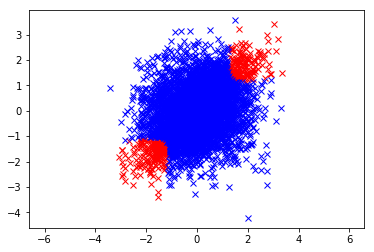

In [9]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = dftest.loc[dftest['label'] == 1.0]
df1 = dftest.loc[dftest['label'] == 0.0]
print(df0.shape)
print(df1.shape)
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')
plt.show()